In [1]:
# Download problem data
!gdown 1-gwzvKABmIpQCxpNjEAcxdBt664cOoK2 # uv_bunny.npy
!gdown 1ImFYNsHOu-pJk9_1jWXvvAGRX8tQPyEA # bun_subsample.npy

Downloading...
From: https://drive.google.com/uc?id=1-gwzvKABmIpQCxpNjEAcxdBt664cOoK2
To: /content/uv_bunny.npy
100% 48.5k/48.5k [00:00<00:00, 55.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ImFYNsHOu-pJk9_1jWXvvAGRX8tQPyEA
To: /content/bun_subsample.npy
100% 72.7k/72.7k [00:00<00:00, 67.9MB/s]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas

In [3]:
# Load problem data
world_points = np.load("bun_subsample.npy") # shape = [N, 3], (X, Y, Z) positions of points in woorld coordinates
uv = np.load("uv_bunny.npy") # shape = [N, 2], (u, v) coordinates of point projections on a camera image

# Camera Resolution
H, W = (720, 1280)

In [4]:
def transform_world_to_camera(K, R, t, world_coords):
    """
    Args:
        K: np.array with shape (3, 3), camera intrinsics matrix.
        R: np.array with shape (3, 3), camera rotation.
        t: np.array with shape (3, ) or (3, 1), camera translation.
        world_coords: np.array with shape (N, 3), cartesian coordinates (X, Y, Z)
            in world frame to transform into camera pixel space.
    Return:
        uv: np.array with shape (N, 2), with (u, v) coordinates of that are
            the projections of the the world_coords on the image plane.
    """
    # --------- YOUR CODE STARTS HERE ---------------
    uv = []
    for i in range(world_coords.shape[0]):
        homog_pix = K.dot(R.dot(world_coords[i, :]) + t)
        uv_pnt = np.array([homog_pix[0] / homog_pix[2], homog_pix[1] / homog_pix[2]])
        uv.append(uv_pnt)
    uv = np.vstack(uv)

    # --------- YOUR CODE ENDS HERE -----------------
    return uv

def pretty_print_solution(K, R, t):
    """
    Print solution nicely for submission in final exam write-up.

    Args:
        K: np.array with shape (3, 3), camera intrinsics matrix.
        R: np.array with shape (3, 3), camera rotation.
        t: np.array with shape (3, ) or (3, 1), camera translation.
    """
    np.set_printoptions(suppress=True)
    print(f"K: \n {np.round(K, 2)}")
    print(f"R: \n {np.round(R, 2)}")
    print(f"t: \n {np.round(t, 2)}")

    return

Text(0.5, 1.0, 'Image')

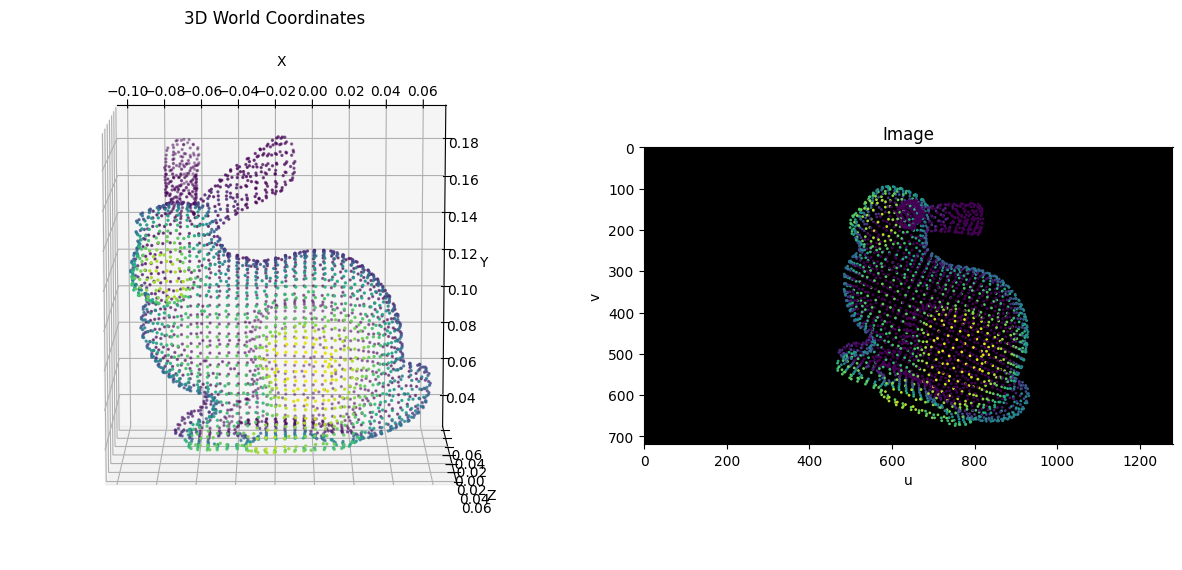

In [5]:
# Plot the problem data
# Set up a figure twice as tall as it is wide
fig = plt.figure(figsize=(15, 30))

# First subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')
colors = plt.cm.viridis(world_points[:, 2] / world_points[:, 2].max())
ax.scatter(world_points[:, 0], world_points[:, 1], world_points[:, 2], s=2, c=colors)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(azim=-90, elev=100)
ax.set_title("3D World Coordinates")

# Second subplot
ax = fig.add_subplot(1, 2, 2)
image = np.zeros((H, W))
ax.imshow(image, cmap="gray")
ax.set_xlabel("u")
ax.set_ylabel("v")
ax.scatter(uv[:, 0], uv[:, 1], c=colors, s=1)
ax.set_title("Image")

In [20]:
# ------------------------------------------------------------------
# Use PnP to compute the intrinsic matrix K and extrinsic values
#   R and t for the camera that captured the image above.
#
#
#   Hints:
#     (1) The function scipy.linalg.rq may be useful.
#     (2) Formulation of the solution for this problem can be found
#           in Lecture 8.
#     (3) The plotting code and function transform_world_to_camera
#           can be used to check your work.
#     (4) Submit a screenshot of the code in this cell with the
#           resulting values printed using the function at the
#           bottom of the cell.
#     (5) Remember to normalize K so that K[2, 2] = 1!
# ------------------------------------------------------------------

# ------------------------- Code Starts Here -----------------------

N = uv.shape[0]
P = np.zeros((2*N, 12))
for i in range(N):
  Pih = np.array([world_points[i, 0], world_points[i, 1], world_points[i, 2], 1])
  P[2*i,:4] = -Pih.copy()
  P[2*i, -4:] = uv[i,0]*Pih.copy()

  P[2*i+1, 4:8] = -Pih.copy()
  P[2*i+1, -4:] = uv[i,1]*Pih.copy()


U, S, Vh = np.linalg.svd(P)
V = Vh.T
M = V[:, np.argmin(S)].reshape(3,4)

RK = M[:, :3].copy()
K, R = scipy.linalg.rq(RK)

t = np.linalg.solve(K, M[:,-1])
K = K/K[2,2]

# -------------------------- Code Ends Here ------------------------

# Uncomment the line below to print the results for submission.
pretty_print_solution(K, R, t)

K: 
 [[637.7  10.  637. ]
 [ -0.  646.8 371. ]
 [ -0.   -0.    1. ]]
R: 
 [[ 0.91  0.42  0.  ]
 [ 0.42 -0.91  0.  ]
 [ 0.   -0.   -1.  ]]
t: 
 [-0.   0.1  0.2]
